<a href="https://colab.research.google.com/github/UQROO-MarianaJetzuvelyGarciaHau/Colab-Tareas/blob/main/Ejercicio_2_Sobreajuste_vs_Subajuste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 2: Sobreajuste vs. Subajuste

Objetivo: Analizar el comportamiento de un Árbol de Decisión con diferentes profundidades para identificar sobreajuste y subajuste.

Pasos:

1. Cargar un conjunto de datos.

2. Entrenar Árboles de Decisión con distintas profundidades (por ejemplo, de 1 a 20).

3. Evaluar accuracy en entrenamiento y prueba.

4. Graficar las curvas de rendimiento.

Recomendaciones: Utiliza validación cruzada para confirmar la profundidad óptima.


Código en Python:


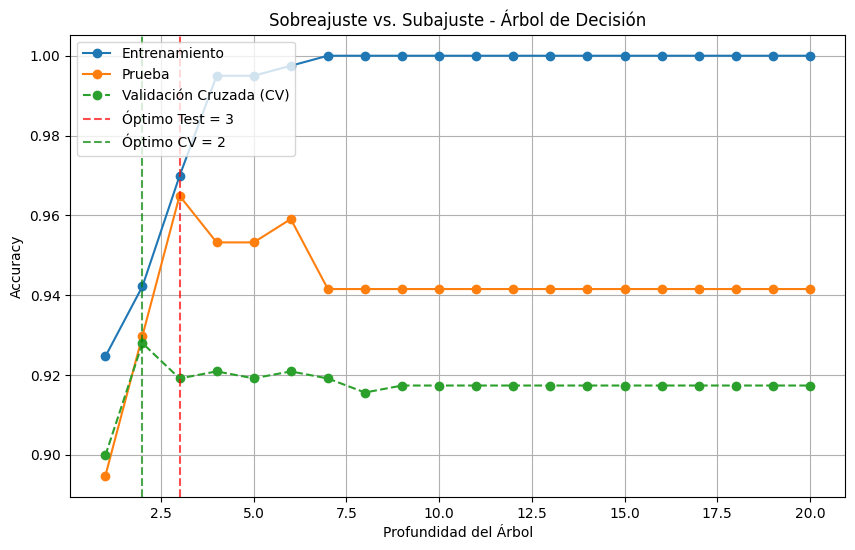

Profundidad óptima según conjunto de prueba: 3
Accuracy en prueba: 0.9649
Profundidad óptima según validación cruzada: 2
Accuracy en CV: 0.9280


In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Cargar el conjunto de datos
X, y = load_breast_cancer(return_X_y=True)

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Evaluar con distintas profundidades
train_scores = []
test_scores = []
cv_scores = []

depth_range = range(1, 21)

for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Accuracy en entrenamiento y prueba
    train_scores.append(accuracy_score(y_train, model.predict(X_train)))
    test_scores.append(accuracy_score(y_test, model.predict(X_test)))

    # Accuracy con validación cruzada (5 particiones)
    cv_score = cross_val_score(model, X, y, cv=5).mean()
    cv_scores.append(cv_score)

# 4. Determinar profundidades óptimas
best_depth_test = depth_range[np.argmax(test_scores)]
best_depth_cv = depth_range[np.argmax(cv_scores)]

# 5. Graficar resultados
plt.figure(figsize=(10,6))
plt.plot(depth_range, train_scores, label='Entrenamiento', marker='o')
plt.plot(depth_range, test_scores, label='Prueba', marker='o')
plt.plot(depth_range, cv_scores, label='Validación Cruzada (CV)', marker='o', linestyle='--')

# Marcar profundidades óptimas
plt.axvline(best_depth_test, color='red', linestyle='--', alpha=0.7,
            label=f'Óptimo Test = {best_depth_test}')
plt.axvline(best_depth_cv, color='green', linestyle='--', alpha=0.7,
            label=f'Óptimo CV = {best_depth_cv}')

plt.xlabel('Profundidad del Árbol')
plt.ylabel('Accuracy')
plt.title('Sobreajuste vs. Subajuste - Árbol de Decisión')
plt.legend()
plt.grid(True)
plt.show()

# 6. Mostrar resultados
print(f"Profundidad óptima según conjunto de prueba: {best_depth_test}")
print(f"Accuracy en prueba: {max(test_scores):.4f}")
print(f"Profundidad óptima según validación cruzada: {best_depth_cv}")
print(f"Accuracy en CV: {max(cv_scores):.4f}")
